https://www.renarepenning.com/weplaynoladata/

## Rena Repenning and Eddy Salazar

# Project Plan


## *Updated by rena 12/12*
https://docs.google.com/document/d/1V47KzrvPq6YNUBH-4N6mWy_EH556zvRhAlRZV9M2-sM/edit


### Data 
1. We Play Data [<sup>1</sup>](#fn1)
    Provided by Christine Neely

### Explanation & Model Proposition
We are inspired by The We Play center's mission: "to offer a safe place to play while engaging in activities that promote brain development." 
Melanie Richardson expressed a need for statistical evidence of We Play's importance.

First, we manually removed empty columns and rows from the five excel files.
Then, we broke apart sheets to make data frames adressing a single concern. During service learning Melanie and Christine heard our Milestone Two plan and asked for **XXXXXXX**

**XXX explain four surveys are weird time frames, sameish columns, and then fam survey is vaugley similar XX**

After looking at all the available data *we intend to model*:
* Use data regarding existing and desired parenting skills to inform WePLAY's curriculum
* Identify why people chose WePLAY over alternative forms of childcare/early education


Graphing pie charts is difficult, and code intensive, in pandas and matplotlib. Writing three of our own ETL functions increased our efficiency and cutdown on lines of code. We added functions to plot pie charts easily, grab column labels, and take numerical series and plot a bar chart and print summary stats. These will allow us to analyze the rest of the data in a much more efficient fashion.

### Collaboration Plan
Rena and Eddy will utilize this repository to simultaneously edit the project. 
We plan on connecting over Zoom as needed and keeping constant communication over instant message. Also, we are both able to meet after class on Thursdays.
When convinient, we will export notebooks to Google Colabs to support simultaneous editing. 
(This is easily done using a Colabs Chrome extension).
While re organizing our final product we used a GoogleDoc to simultaneouslt outline and plan.

### Footnotes
<span id="fn1"> 1. WePLAY data was last downloaded on October 25th, 2021. We could not use a live link because of spaces in filenames.</span>

# Exploring WePLAY Survey Results

Provided by Christine Neely from WePlay by Training Grounds nola. Data last accessed on October 25th.

##### Imports as needed

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
#from matplotlib import cm
import geopandas as gpd
!pip3 install geopandas
!pip3 install descartes
!pip3 install openpyxl # package to open xlsx files

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport numpy as np\n#from matplotlib import cm\n!pip3 install geopandas\n!pip3 install descartes\nimport geopandas as gpd\n!pip3 install openpyxl # package to open xlsx files\n'

Separate paths to accomodate for our local environments

In [6]:
renapath = "../notebooks/_data/WePlayData/CleanedWPC"
edpath = "./_data/WePlayData/CleanedWPC"
# PATH -- set path variable 
path = renapath  # path to manually cleaned excels

# Extraction, Transform, and Loading Key Functions

#### **plotPies**

* df= dataframe to graph
* cols = the df's columns to be used as titles; can pass in `getLabels(df)`
* labels = labels for sections
* allLabelsSame = if True, make a list of labels' to get same format for all label inputs
* isNAct = if we use .isna() before value counts
For now, we will leave legends repeating because that function pairs names and values correctly.

#### printCatBars
* df
* key
* att (like df.key, but pandas doesn't allow .key in place of .attribute to calculate summary stats
* printStats=True

#### printHorizBars
* df 
* key

#### plotSection
* cols
* i1
* i2
* plotBars="key"
* plotBarsHoriz=False
* pie=True

#### **getLabels**
* returns a list of lists of values for each column, using pandas.unique

In [109]:
#     cs=cm.Set1(np.arange(40)/40.) # for colors  colors=cs,

def plotPies(df, labels, allLabelsSame, isNAct, ishoriz=True):
    cols = df.columns
    # create matplotlib axis
    if ishoriz:
        fig1, ax1 = plt.subplots(nrows=1,ncols=len(cols),figsize=(20,15))
    else:
        fig1, ax1 = plt.subplots(nrows=len(cols),ncols=1,figsize=(20,15))
    # if all labels are the same we make a cols long list of them --> accomodate dif label inputs
    if allLabelsSame:
        labels = [labels]*len(cols)
    keys = [] #print key above all instead of individually
    for i, c in enumerate(df.columns): # incanse our graph titles are going to be differend
        #Pie chart citation: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
        if isNAct:#if we want to plot using is na
            wedges = ax1[i].pie(df[c].isna().value_counts(), autopct='%1.1f%%', shadow=True, startangle=90)#labels=labels[i],
        else:
            wedges = ax1[i].pie(df[c].value_counts(), autopct='%1.1f%%', shadow=True, startangle=90)#labels=labels[i],
        
        ax1[i].set_title(str(i+1))
        if isinstance(cols[i],str):
            keys += [str(i+1) +". "+ cols[i]]
        else:
            keys += [str(i+1) +". "+ cols[i][0]]
        
        ax1[i].axis('equal')
        # label individually, when we must
        if allLabelsSame == False:
            ax1[i].legend(wedges[0], labels[i],
                  title="Legend", # must plot a unique legend for each to keep value/label pairs uniform
                  loc="upper left",
                  bbox_to_anchor=(1, 0, 0.5, 1))
        
    # label for all to save space
    if allLabelsSame:
        ax1[0].legend(wedges[0], labels[0],
                      title="Legend", # must plot a unique legend for each to keep value/label pairs uniform
                      loc="upper left",
                      bbox_to_anchor=(1, 0, 0.5, 1))
    # Label each graph - matplot title is messy
    print("KEYS:")
    for k in keys:
        print(k)
    plt.show()
    


In [110]:
def getLabels(df):    
    labels = ["x"]*len(df.columns)
    for i, c in enumerate(df.columns):
        labels[i] = df[c].unique()
    return labels
    # beware: will return nan

### Displaying barchart and summary stats for numeric variables

In [9]:
def printCatBars(df, key, att, printStats=True):
    # att -- > is df.col_name attribute for calling summary stat functions
    p = df[key].value_counts()
    p.sort_index(inplace=True)
    p.plot.bar(align="center", color="pink")
    
    if printStats: # skip for qualitative data
        # convert numeric values
        df[key].apply(pd.to_numeric, errors='coerce')
        print("SUMMARY STATS\n","AVG: ", att.mean()[0],"\nMax,Min: ",att.min()[0],",",att.max()[0])

# printing horizontal bar charts for x values with long labels
def printHorizBars(df, key):
    p = df[key].value_counts()
    p.sort_index(inplace=True)
    p.plot.barh(align="center", color="pink")
    

### Plotting batches of aggregated data, with option to add in bar chart

In [19]:
# plotBars -> plots a bar graph if we send in col, attribute
def plotSection(cols, i1, i2, plotBars="key", plotBarsHoriz=False, pie=True, isNAct=False):
    df = allIncoming.iloc[1:, i1:i2]
    df.columns = [cols]
    
    if (pie) and (plotBarsHoriz==False):
        # use labels function if non-bin question. else we make it T/f
        if isNAct == False:
            plotPies(df, getLabels(df), False, isNAct, True)
        else:
            plotPies(df, ["True", "False"], True, isNAct, True)
    if plotBars != "key":
        if plotBarsHoriz == False:
            print("Taking a closer look at ",plotBars,":")
            printCatBars(df, plotBars, df[plotBars], False)
        else:
            printHorizBars(df, plotBars)

# Incoming Family Data
### Four spreadsheets aggregated
Explain method, etc

In [125]:
# JULY BATCH
incomingjuly2019 = pd.read_excel(path + "IncomingParentReflection-July2019" + ".xlsx")
incomingjuly2019["Sheet"] = "July19"
incomingjuly2019.drop([1], axis=0, inplace = True) #delete row full of test reponses
# NOV BATCH
incomingnov2019 = pd.read_excel(path + "IncomingParentReflection-November2019" + ".xlsx")
incomingnov2019["Sheet"] = "Nov19"
incomingnov2019.drop([0], axis=0, inplace = True)
# 2020 BATCH
incoming2020 = pd.read_excel(path + "IncomingParentReflectionForm2020" + ".xlsx")
incoming2020["Sheet"] = "2020"
incoming2020.drop([0], axis=0, inplace = True)
# UNDATED BATCH
incoming_undated = pd.read_excel(path + "IncomingParentReflection" + ".xlsx")
incoming_undated["Sheet"] = "NoDate"
# Create DF of all similar surveys
pd.set_option('display.max_columns',None) #display all columns
allIncoming = pd.concat([incomingjuly2019, incomingnov2019.iloc[1:,:], incoming2020.iloc[1:,:], incoming_undated.iloc[1:,:]], ignore_index=True)
            
print("Notes: -- Adults means over 19  -- Children means under 18 -- Resp = Respondant\n")


Notes: -- Adults means over 19  -- Children means under 18 -- Resp = Respondant



In [111]:
# allIncoming["Sheet"].value_counts()

In [127]:
from datetime import datetime
'''this only casts as nans '''
# allIncoming.Date.unique()
# allIncoming['Date'].describe()

#allIncoming['DateYr'] = pd.DatetimeIndex(allIncoming['Date']).year# + pd.DatetimeIndex(allIncoming['Date'].year)
# plotSection("Date", 0, 1, pie=False, plotBars="Date", plotBarsHoriz=True) 
# dates = allIncoming['Date'][1:].dt.to_period('M')

#https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
'''Graph/display date distribution somehow (by month)?'''
#allIncoming['Date']


'Graph/display date distribution somehow (by month)?'

### Survey Respondant information

In [15]:
# plotSection(["Resp_Gender", "Resp_Age", "Resp_Race"], 1, 4, "Resp_Age")
'''Survey Respondant Info'''

'Survey Respondant Info'

In [ ]:
#plotSection(["Adults", "Children", "Zip"], 5, 8, "Zip")
'''Home info: # Adults, # Children, Zip'''

In [ ]:
#plotSection(["Income", "Highest Level of education"], 9, 11)
'''Respondant Demographic'''

Information about children brought to WePLAY

In [ ]:
'''child_nov2019 = incomingnov2019.iloc[1:, 17:33]
child_nov2019.drop(["Unnamed: 20","How old is the 1st child?.1","What is the 1st child's gender?","What is your relationship to the 1st child?","Unnamed: 24","How old is the 1st child?","What is the 1st child's gender?","What is your relationship to the 1st child?.1"], axis=1, inplace = True)
child_nov2019.columns = [["1st child age","1st child's gender","1st resp relationship to child","2nd child age"," 2nd child's gender","resp relationship to 2nd child","3rd child age"," 3rd child's gender","resp relationship to 3rd child"]]                   
#child_nov2019'''
childDemo = allIncoming[["How old is the 1st child?","What is the 1st child's gender?","What is your relationship to the 1st child?","How old is the 2nd child?","What is the 2nd child's gender?","What is your relationship to the 2nd child?"]]
childDemo.columns = [["1st child age","1st child's gender","resp relationship to 1st child","2nd child age"," 2nd child's gender","resp relationship to 2nd child"]]                   
# childDemo

## this just tells gender and age of children + age of child 2, age child three
# then relationship , relationship 2, other

### How and why WPC

Respondant's reasoning for attending WePLAY versus other forms of early childhood education

In [108]:
print("Q: Which of the following are reasons that you have not applied for childcare?\nPlease select all that apply. (\"No\" label means option wasn't selected)")
c = [
    "I feel my child is not old enough",
    "There is a lack of quality childhood care",
    "I use a nanny",
    "I use a family member",
    "Other",
    "What type of childcare program is it?"]
# plotSection(c, 30, 36)   

Q: Which of the following are reasons that you have not applied for childcare?
Please select all that apply. ("No" label means option wasn't selected)


In [13]:
# plotSection("x", 36, 37, pie=False, plotBars="x", plotBarsHoriz=True) 
'''Why have you not applied to day care?'''

'Why have you not applied to day care?'

In [14]:
# plotSection("y", 37, 38, pie=False, plotBars="y", plotBarsHoriz=True) 
'''Where else have you sought child care'''

'Where else have you sought child care'

In [60]:
# cols = ["Sign/Poster/flyer", "Friend", "Website", "Social Media", "Other org"]#, "Lafitte Fauborg Housing Office"]
# plotSection(cols, 120, 125, isNAct=True) 
# print("Other: ")
# allIncoming.iloc[:,126].unique()[2:]
'''How respondants found the WePLAY center'''

'How respondants found the WePLAY center'

### Parenting: Concerns, strengths, and progress

Using plot pies rather than plot sections to repurpose code we created before aggregating all four sets

In [79]:
#create df with directly comparable info about how parents interact with their children before and after WePlay
parent_child_behaviorsa = allIncoming[["Please think about each statement and how you currently feel","Unnamed: 59","Unnamed: 60","Unnamed: 61","Unnamed: 62","Unnamed: 63"]]
parent_child_behaviorsb = allIncoming[['"Since coming to the We PLAY Center I…"',"Unnamed: 97","Unnamed: 98","Unnamed: 99","Unnamed: 100","Unnamed: 101"]]
parent_child_behaviorsa.drop([0], axis=0, inplace = True)
parent_child_behaviorsb.drop([0], axis=0, inplace = True)
parent_child_behaviorsa.columns = [["Read to my child (Before WP)","Play with my child (Before WP)","Talk to my child (Before WP)", "Listen to my child (Before WP)","Set limits with my child (Before WP)","Yell at my child (Before WP)"]]
parent_child_behaviorsb.columns = [["Read to my child (Since WP)","Play with my child (Since WP)","Talk to my child (Since WP)","Listen to my child (Since WP)","Set limits with my child (Since WP)","Yell at my child (Since WP)"]]
#print("Parent/child interaction before WePLAY")
#plotPies(parent_child_behaviorsa, getLabels(parent_child_behaviorsa), False, False, ishoriz=True)
#print("Parent/child interaction after WePLAY")
#plotPies(parent_child_behaviorsb, getLabels(parent_child_behaviorsb), False, False, ishoriz=True)


How parents see their parenting

In [86]:
# #create df with info about how parents feel they've grown since We Play
# currently_Parents_feel = allIncoming[["Think about each statement and how you currently feel .","Unnamed: 42","Unnamed: 43","Unnamed: 44","Unnamed: 45","Unnamed: 46","Unnamed: 47",'"Overall..."',"Unnamed: 25","Unnamed: 26","Unnamed: 27","Unnamed: 28","Unnamed: 29","Unnamed: 30","Unnamed: 31","Unnamed: 32","Unnamed: 33","Unnamed: 34"]]
# #Rename columns
# currently_Parents_feel.columns = [["I stress about parenting...","I use positive parenting strategies...","I understand my child’s behavior...","I am able to comfort my child when he/she is upset...","I attend Parenting Learning Opportunities (workshop)...","I feel overwhelmed with my child’s behavior...","I feel my child is exposed to activities that stimulate his/her development...","I feel confident as a parent","I have access to resources to become a better parent","I want to learn strategies to improve my parenting skills","I understand child development","I know age appropriate expectations for my child","I know how to foster my child’s development","I am knowledgeable about positive and nurturing parenting strategies","I utilize positive parenting strategies","I am supported in my role as a parent/caregiver","I have a support system that consist of families with children of similar ages as my child","I spend time with my child doing what he/she likes to do."]]

# currently_Parents_feel

How parents have grown since the WePLAY
These sections only had a few (omitted) answers besides those pictured.

KEYS:
1. My stress level as a parent...
2. My knowledge about parenting support and resources in the community...
3. My knowledge about my child’s development...
4. My knowledge about how to foster my child’s development...
5. My knowledge about nurturing and responsive parenting strategies...
6. My knowledge about nutrition and breastfeeding...
7. My confidence in my role as a parent...


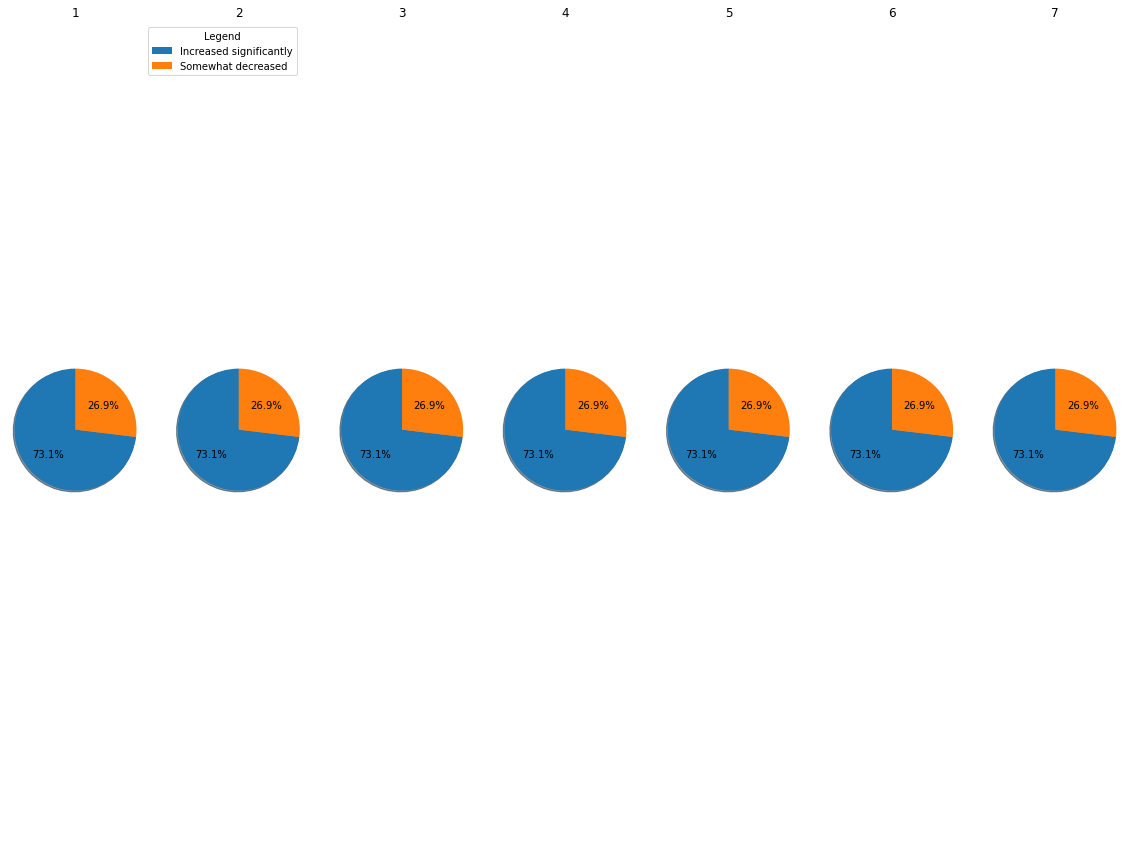

KEYS:
1. I engage with my child by repeating his/her words or sounds...
2. I engage with my child in pretend play...
3. I stand back and let my child work through problems...
4. I engage in bonding activities with my child...
5. I am better able to help my child uses age appropriate social skills...
6. I am better able to support my child as he/she learns new skills...


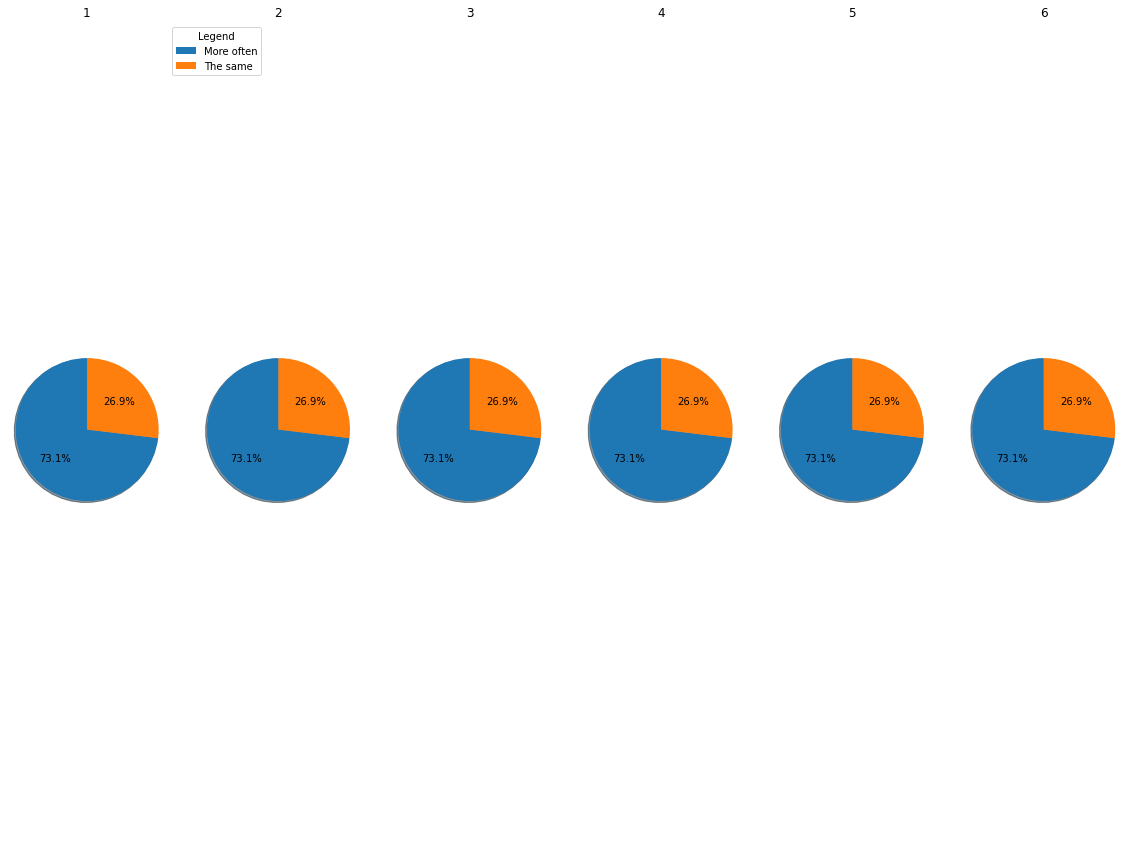

In [106]:
#create df with info about how parents feel they've grown since We Play
since_WP_Parents_nov2019a = incomingnov2019[["After coming to the center, which of the following aspects have changed for you as a parent? Please choose one option for each statement.","Unnamed: 78","Unnamed: 79","Unnamed: 80","Unnamed: 81","Unnamed: 82","Unnamed: 83"]]
since_WP_Parents_nov2019b = incomingnov2019[['"Since coming to We PLAY Center…"',"Unnamed: 97","Unnamed: 98","Unnamed: 99","Unnamed: 100","Unnamed: 101"]]
# Rename columns
since_WP_Parents_nov2019a.columns = [["My stress level as a parent...","My knowledge about parenting support and resources in the community...","My knowledge about my child’s development...","My knowledge about how to foster my child’s development...","My knowledge about nurturing and responsive parenting strategies...","My knowledge about nutrition and breastfeeding...","My confidence in my role as a parent..."]]
since_WP_Parents_nov2019b.columns =[["I engage with my child by repeating his/her words or sounds...","I engage with my child in pretend play...","I stand back and let my child work through problems...","I engage in bonding activities with my child...","I am better able to help my child uses age appropriate social skills...","I am better able to support my child as he/she learns new skills..."]]
# plot seperately so labeling is nic

plotPies(since_WP_Parents_nov2019a, ["Increased significantly", "Somewhat decreased"], True, True)
plotPies(since_WP_Parents_nov2019b, ["More often", "The same"], True, True)


How children have grown since WePlay

KEYS:
1. My child's early learning and cognitive skills...
2. My child's early language abilities...
3. My child's early social emotional skills...
4. My child's school readiness...


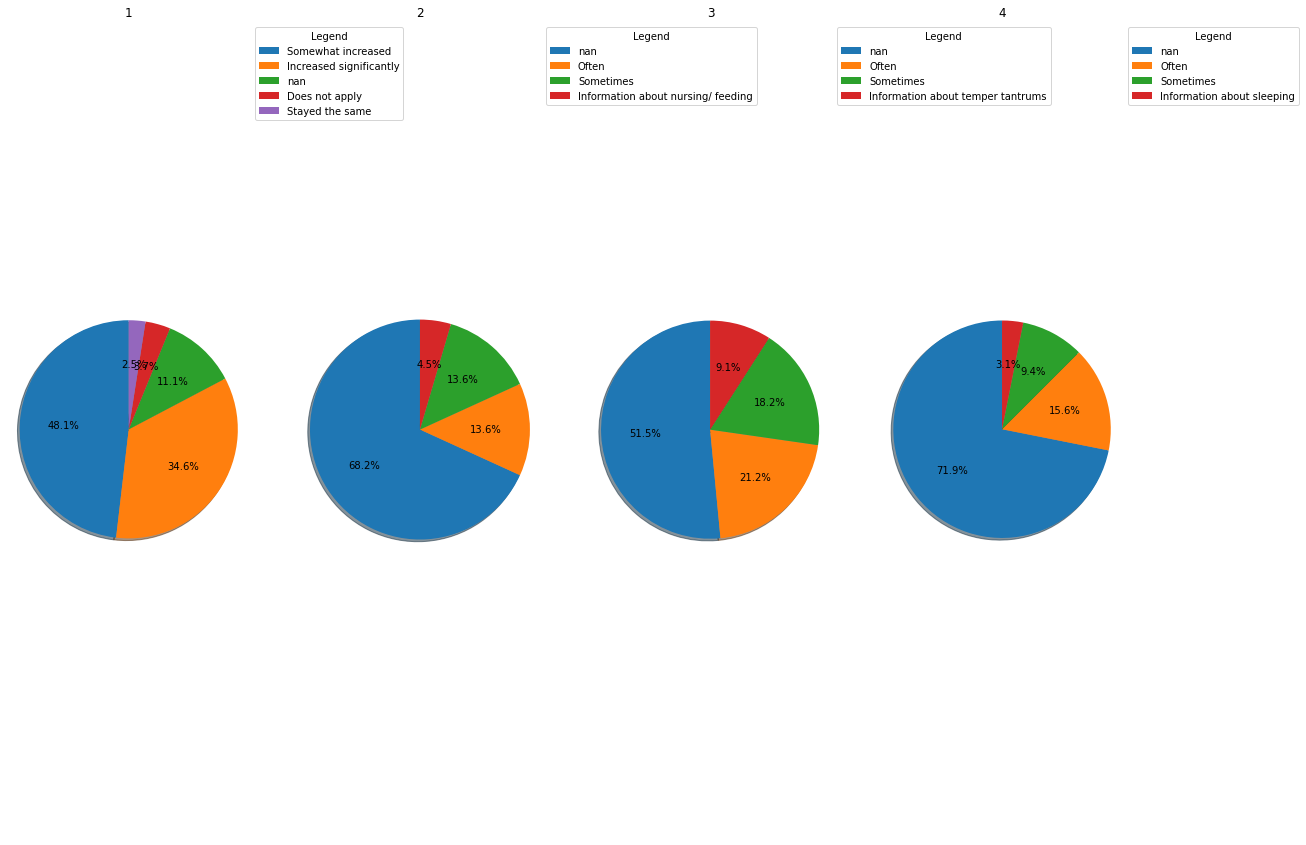

In [104]:
#create df with info about how parents feel their children have grown since We Play
childGrowthSince = allIncoming[["Since attending the We PLAY Center, which of the following aspects of your child's development have changed? Please choose one option for each statement.","Unnamed: 58","Unnamed: 59","Unnamed: 60"]]
#Rename columns
childGrowthSince.columns = [["My child's early learning and cognitive skills...","My child's early language abilities...","My child's early social emotional skills...", "My child's school readiness..."]]
#drop unnesscary row with response parameters
childGrowthSince.drop([0], axis=0, inplace = True)


plotPies(childGrowthSince, getLabels(childGrowthSince), False, False)

## only one here works


### Parent reviews and needs

XXX

Data on what kind of info parents want more of from WP

In [98]:
#create df with survey info about what kind of info parents want more of
desired_info = allIncoming[["Which of the following aspects would you like the We Play Center to address more often? Please select all that apply and use the space to write in any additional comments.","Unnamed: 109","Unnamed: 110","Unnamed: 111","Unnamed: 112","Unnamed: 113","Unnamed: 114","Unnamed: 115","Unnamed: 116","Unnamed: 117"]]
#Rename columns
desired_info.columns = [["Stress Relief","Information about community resources","Information about how to foster my child’s development", "Information about nurturing and responsive parenting strategies","Information about mouthing (biting, putting objects in their mouth)","Information about conflict resolution","Information about sharing","Information about nursing/ feeding","Information about temper tantrums","Information about sleeping"]]
desired_info = ~desired_info.isna()

print('"Which of the following aspects would you like the We Play Center to address more often?\n')
#plotPies(desired_info, ["True", "False"], True, False)


"Which of the following aspects would you like the We Play Center to address more often?



KEYS:
1. Provides an enriched learning environment, provides educational toys
2. Offers an adequate number of toys
3. Creates a positive welcoming friendly atmosphere
4. Staff is knowledgeable and answer questions willingly
5. Staff is patient and empathetic
6. Been helpful to my family
7. Given me more confidence as a parent
8. Helped me to become a better parent
9. Provided me with positive parenting strategies
10. Supported me in my role as a parent/caregiver
11. Created a support system with other members of the We PLAY Center


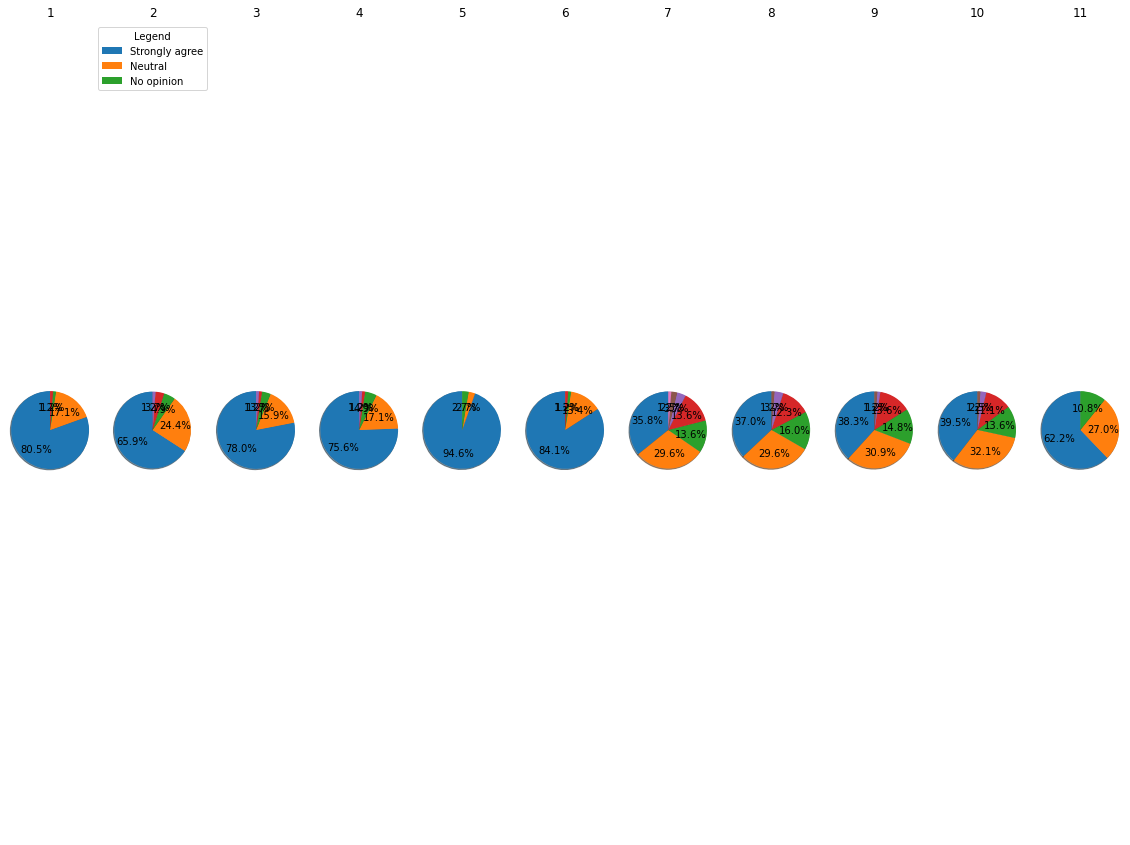

In [96]:
#create df with parent's other opinions on WePlay
other_WP_opinions = allIncoming[['"The We PLAY Center..."',"Unnamed: 86","Unnamed: 87","Unnamed: 88","Unnamed: 89",'"The We PLAY Center has..."',"Unnamed: 91","Unnamed: 92","Unnamed: 93","Unnamed: 94","Unnamed: 95"]]
#Rename columns
other_WP_opinions.columns = [["Provides an enriched learning environment, provides educational toys","Offers an adequate number of toys","Creates a positive welcoming friendly atmosphere", "Staff is knowledgeable and answer questions willingly","Staff is patient and empathetic","Been helpful to my family","Given me more confidence as a parent","Helped me to become a better parent","Provided me with positive parenting strategies","Supported me in my role as a parent/caregiver","Created a support system with other members of the We PLAY Center"]]
#drop unnesscary row with response parameters
plotPies(other_WP_opinions, ["Strongly agree", "Neutral", "No opinion"], True, False)



## messy labeling here

Open response - what will keep people coming back?

In [ ]:
#create df with open response detailing what parents say will keep them coming back
keep_coming_back = allIncoming[["What will keep you coming back to the We PLAY Center?"]]
#keep_coming_back


# Family Survey Data

##### Responses about the familes attending WePLAY
NOTE: this section must be read in order to avoid dropping bar graph columns

* FamilySurvey.xlsx data was collected between Jan-Aug 2019

In [ ]:
familySurveyDf = pd.read_excel(path + "FamilySurvey" + ".xlsx")

print("Notes: -- Adults means over 19  -- Children means under 18 -- Resp = Respondant\n")
adult_FDa = familySurveyDf.iloc[1:, :5]
adult_FDa.columns = [["Resp_Gender", "Resp_Age", "Resp_Race", "Children", "AdultsAtHome"]]
adult_FDb = familySurveyDf.iloc[1:, 5:10]
adult_FDb.columns = [["Zip", "OMIT", "Avg_Income", "highest_edu", "visits_Monthly"]]
adult_FDb.drop(columns=["OMIT"], inplace=True)#,level=level)


Zipcodes

In [ ]:
printCatBars(adult_FDb, "Zip", adult_FDb.Zip, False)

#### There is a wide distribution of ages of parents bringing their children to We Play but it is centered around the mid thirties


In [ ]:
printCatBars(adult_FDa, "Resp_Age", adult_FDa.Resp_Age)

#### Most households attending WePlay have two adults in them

In [ ]:
printCatBars(adult_FDa, "AdultsAtHome", adult_FDa.AdultsAtHome)

In [ ]:
# drop columns to plot bars
adult_FDa.drop(columns=["Resp_Age", "AdultsAtHome"], inplace=True)
labels=getLabels(adult_FDa)
plotPies(adult_FDa, labels, False, False, True)

adult_FDb.drop(columns=["Zip"], inplace=True) # drop columns to plot bars
labels=getLabels(adult_FDb)
plotPies(adult_FDb, labels, False, False, True)

Looking more closely at income, we see that most attendees make ??

** Need to re order these!! **

In [74]:
printCatBars(adult_FDb, "Avg_Income", adult_FDb.Avg_Income, False)

NameError: name 'adult_FDb' is not defined

## Family survey

#### Info about how parents found the we play center, showing the succesful usage of multiple channels for attracting familes
Word of mouth is WePlay's best advertisement, by far!

In [ ]:
how_found_WPC = familySurveyDf.iloc[1:, 10:17]
how_found_WPC.columns = ["Sign/Poster/flyer", "Friend", "Website", "Social Media", "Other org", "Laf-Fau Housing Office", "Other"]
plotPies(how_found_WPC, ["Yes", "No"], True, True)


#### Demographics of children that are brought to the weplay center

In [ ]:
child_FD = familySurveyDf.iloc[1:, 17:24] # combined 18/19 into 17 manually
child_FD.columns = ["Gender", "Age", "age2", "age3", "parent", "age4", "misc"]
child_FD.drop(columns=["age2", "age3", "age4", "misc", "parent"], inplace=True)
child_FD["Gender"][~(child_FD.Gender == 'Male' ) & ~(child_FD.Gender == 'Female')] = np.nan

labels=getLabels(child_FD)
plotPies(child_FD, labels, False, False)


### Parenting Skills

#### "Please share the number of days in a typical week that you engage in the following activities"

In [ ]:
daysActivitys_FD = familySurveyDf.iloc[1:, 24:27]
daysActivitys_FD.columns = ["Read Stories", "Play Music or Sing", 
                     "Engage in language building activities"]
labels = ['Never', 'Every day', '1-2 days', '3-6 days']

plotPies(daysActivitys_FD, labels, True, False)

In [ ]:
daysActivitys_FD = familySurveyDf.iloc[1:, 27:29]
daysActivitys_FD.columns = ['Engage in play', 'Create opportunities for your child to "practice" self control']
plotPies(daysActivitys_FD, getLabels(daysActivitys_FD), False, False)


#### Please state how strongly you agree with the following statements

In [ ]:
parenting_FD = familySurveyDf.iloc[1:, 29:34]
parenting_FD.columns = ['I respond quickly to my child\'s cries', 'I am able to comfort my child when he/she is upset',
 'I know the meaning of my child\'s signals (cry, turning away, rubbing eyes)',
 'I step back and encourage my child to work through problems',
 'I am able to follow my child\'s lead during playtime']
cols = parenting_FD.columns
labels = ['Mostly agree', 'Somewhat agree', 'neither agree nor disagree',
       'Strongly agree', 'Mostly disagree', 'Strongly disagree','Somewhat disagree']
plotPies(parenting_FD, labels, True, False)


#### Parents vary in how they discipline. Below are some strategies parents used to discipline their children during the last 7 days:

In [ ]:
discipline_FD = familySurveyDf.iloc[0:, 34:42]
discipline_FD.columns = ['Raising your voice or yelling', 'Spanked/Slapped', 'Took away a toy or treats', 'Positive Reinforcement', 'Offered choices', 'Time-out', 'Explained why his/her behavior is not appropriate', 'Recognized and regulated your feelings']
labels = ["Never", "Always", "Very Often", "Sometimes", "Rarely"]
plotPies(discipline_FD,  labels, True, False)

#### The We PLAY Center strives to create a welcoming environment with toys and caring, knowledgable staff. How well do parents think We Play meets these goals?

In [ ]:
environmentstatements_FD = familySurveyDf.iloc[1:, 42:48]
labels = ['Strongly agree','Strongly disagree', 'Mostly agree',
       'Neither disagree nor agree', 'Somewhat agree',
       'Somewhat disagree']
environmentstatements_FD.columns = familySurveyDf.iloc[0, 42:48]
plotPies(environmentstatements_FD, labels, True, False)

#### We Play strives to help parents and children grow. The questions below help to illustrate how well We Play is fulfilling those goals:

In [ ]:
attendance_feedback = familySurveyDf.iloc[1:, 48:53]
labels = ['Strongly agree','Strongly disagree', 'Mostly agree',
       'Neither disagree nor agree', 'Somewhat agree',
       'Somewhat disagree']
attendance_feedback.columns = familySurveyDf.iloc[0, 48:53]

plotPies(attendance_feedback, labels, True, False)

#### Below are written responses from families on what will keep them returning to the We Play Center. A commonality between many of the responses is the love for the staff at the WePlay Center.

In [ ]:
weplay_review = familySurveyDf.iloc[1:, 56:58]
labels = getLabels(weplay_review)
print("What will keep you coming back to the We PLAY Center?:\n")
print(labels[0][1:])

In [ ]:
print("What aspect of the We PLAY Center do you find most helpful?:\n")
print(labels[1][1:])

## Geopandas
https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630

In [18]:
fp = './_data/new-orleans-tax-parcel.shp'
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head()

# map_df.plot()

DriverError: Unable to open ./_data/new-orleans-tax-parcel.shx or ./_data/new-orleans-tax-parcel.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

# Final Recommendations

# Automatic updating for Git Pages
Use gh-pages branch to display on Rena's personal website

In [ ]:
# # make sure to push changes from main first!
# !git checkout gh-pages
# !git pull #update gh-pages with stuff from main

### automatically create index.html

In [ ]:
# convert this file to HTML
!jupyter nbconvert --to html FinalTutorial.ipynb

# Delete old index.html
!rm index.html
# move MilestoneTwo.html to index.html
!mv FinalTutorial.html index.html

# Push to Rena's repo
!git config --global user.name "renarepenning"
!git config --global user.email "rrepenning@tulane.edu"
!git add -A
!git commit -m "auto update index.html"

# !git push
# must push manually!

Make sure to checkout main before going back to work!